## Example provided by xrayutilities  (Fe and Co)

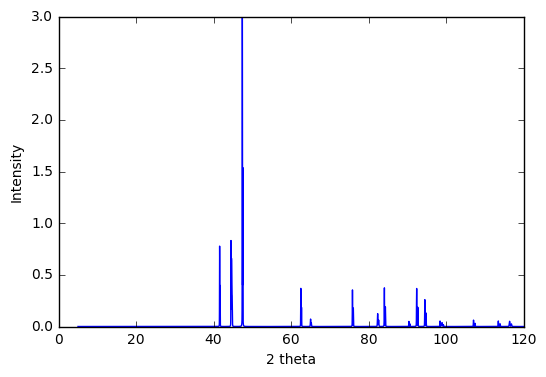

In [2]:
import numpy
import xrayutilities as xu
import matplotlib.pyplot as plt
from pymatgen.matproj.rest import MPRester
from xrayutilities.materials.cif import CIFFile
from xrayutilities.materials.material import Crystal

two_theta = numpy.arange(5, 120, 0.01)
Fe_powder = xu.simpack.Powder(xu.materials.Fe, 1,
                              crystallite_size_gauss=100e-9)
Co_powder = xu.simpack.Powder(xu.materials.Co, 5,  # 5 times more Co
                              crystallite_size_gauss=200e-9)
pm = xu.simpack.PowderModel(Fe_powder, Co_powder, I0=100)
intensities = pm.simulate(two_theta)
plt.plot(two_theta,intensities)
plt.xlabel("2 theta")
plt.ylabel("Intensity")
plt.show()

## Our AlPO4, structure pulled from Materials Project

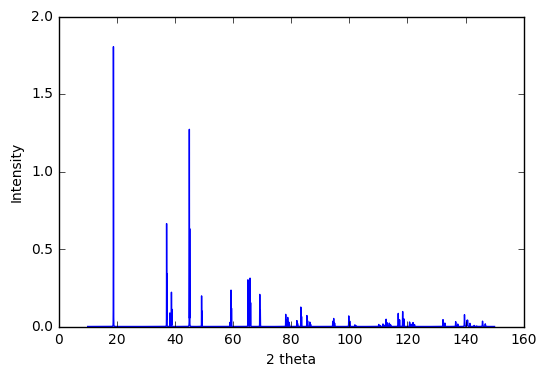

In [9]:
API_key = "bKdWfwT3MVhH9p1E" #John's API key

AlPO4_id = "mp-4051" # AlPO4, our novel auxetic material candidate
with MPRester(API_key) as r:
    AlPO4_structure = r.get_structure_by_material_id(AlPO4_id)

AlPO4_structure.to(fmt="cif", filename="mp-4051_cif_file") 

AlPO4_xu_cif = CIFFile("mp-4051_cif_file")
AlPO4_crystal_xu = Crystal(name="AlPO4", lat=AlPO4_xu_cif.SGLattice())

two_theta = numpy.arange(10, 80, 0.01)

AlPO4_powder = xu.simpack.smaterials.Powder(AlPO4_crystal_xu, 1)
pm = xu.simpack.PowderModel(AlPO4_powder, I0=100)
intensities = pm.simulate(two_theta)
plt.plot(two_theta,intensities)
plt.xlabel("2 theta")
plt.ylabel("Intensity")
plt.show()